<a href="https://colab.research.google.com/github/FatemeMolaeiJahromi/FatemeMolaeiJahromi/blob/Leishmania-Classification/LeishmaniaDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=ef6221c84b4726503679b286f30b7f0b72754aa54631d5acc8794054b9ad7e2a
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


    amastigote_number  field_num
0                  42         17
1                  83         15
2                  48         19
3                  15         12
4                  81         18
..                ...        ...
95                 49         15
96                 60         16
97                 45         13
98                 21         19
99                 60         13

[100 rows x 2 columns]


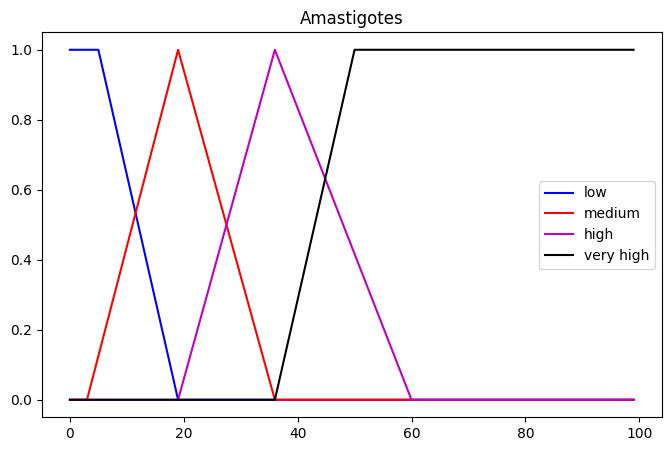

number of Amastigotes 60
number of fields 13
Final Grade: grade_4


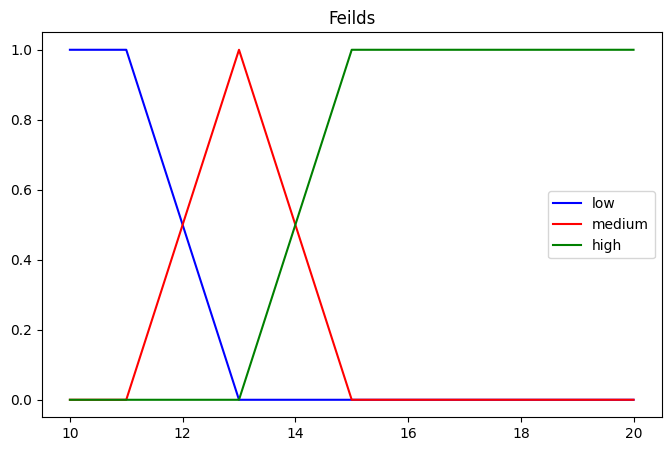

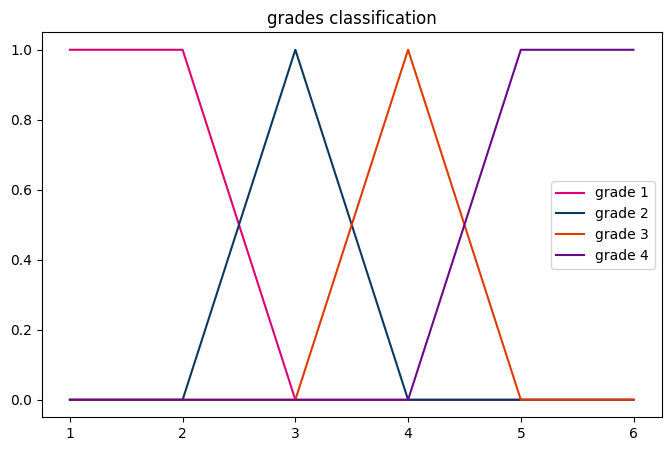

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

data = []
for i in range(100):
  amastigote_number = np.random.randint(1,100)
  field_num = np.random.randint(10,20)
  data.append({"amastigote_number": amastigote_number, "field_num": field_num})
df = pd.DataFrame(data)
print(df)

#inputs
x_amastigote = np.arange(0,100,1)
x_feild = np.arange(10,21,1)
x_grades = np.arange(1,7,1)

#Amastigotes
y_amastigote_low = fuzz.trapmf(x_amastigote,[0,0,5,19])           # x<=5
y_amastigote_medium = fuzz.trimf(x_amastigote,[3,19,36])          # 6<=x<=21
y_amastigote_high = fuzz.trimf(x_amastigote,[19,36,60])           # 21<=x<=50
y_amastigote_very_high = fuzz.trapmf(x_amastigote,[36,50,100,100])# x>50

#Feilds
y_feilds_low = fuzz.trapmf(x_feild, [10, 10, 11,13])
y_feilds_meduim = fuzz.trimf(x_feild, [11, 13, 15])
y_feilds_high = fuzz.trapmf(x_feild, [13,15, 20, 20])

#Grades Classification
y_classification_g1 = fuzz.trapmf(x_grades,[1,1,2,2])
y_classification_g2 = fuzz.trimf(x_grades,[2,3,3])
y_classification_g3 = fuzz.trimf(x_grades,[3,4,4])
y_classification_g4 = fuzz.trapmf(x_grades,[5,5,6,6])

#visualize Amastigotes membership
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_amastigote,y_amastigote_low,'b',label = 'low')
ax.plot(x_amastigote,y_amastigote_medium,'r',label = 'medium')
ax.plot(x_amastigote,y_amastigote_high,'m',label = 'high')
ax.plot(x_amastigote,y_amastigote_very_high,'black',label = 'very high')
ax.set_title('Amastigotes')
ax.legend()
plt.show()

#visualize Feilds membership
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_feild,y_feilds_low,'b',label = 'low')
ax.plot(x_feild,y_feilds_meduim,'r',label = 'medium')
ax.plot(x_feild,y_feilds_high,'g',label = 'high')
ax.set_title('Feilds')
ax.legend()
#plt.show()

#visualize grades classification
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_grades,y_classification_g1,'#DF0174',label = 'grade 1')
ax.plot(x_grades,y_classification_g2,'#0B3861',label = 'grade 2')
ax.plot(x_grades,y_classification_g3,'#DF3A01',label = 'grade 3')
ax.plot(x_grades,y_classification_g4,'#6A0888',label = 'grade 4')
ax.set_title('grades classification')
ax.legend()
#plt.show()

# find membership degree of each Amastigote factor based on Amastigote numbers
Amastigote_factor_low = fuzz.interp_membership(x_amastigote,y_amastigote_low,amastigote_number)
Amastigote_factor_medium = fuzz.interp_membership(x_amastigote,y_amastigote_medium,amastigote_number)
Amastigote_factor_high = fuzz.interp_membership(x_amastigote,y_amastigote_high,amastigote_number)
Amastigote_factor_very_high = fuzz.interp_membership(x_amastigote,y_amastigote_very_high,amastigote_number)

# find membership degree of each fields factor based on fields number
fields_factor_low = fuzz.interp_membership(x_feild,y_feilds_low,field_num)
fields_factor_medium = fuzz.interp_membership(x_feild,y_feilds_meduim,field_num)
fields_factor_high = fuzz.interp_membership(x_feild,y_feilds_high,field_num)

# rule1. If amastigote number is low and field numbers are high then it's leishmania grade1 with weight = 0.9
activation_rule_1 = np.fmax(Amastigote_factor_low, fields_factor_high)
rule_1_result = np.fmin(activation_rule_1, y_classification_g1)
w1 = 0.9

# rule2. If amastigote number is medium and field numbers are medium then it's leishmania grade2 with weight = 0.98
activation_rule_2 = np.fmax(Amastigote_factor_medium, fields_factor_medium)
rule_2_result = np.fmin(activation_rule_2, y_classification_g2)
w2=0.98

# rule3. If amastigote number is high and field numbers are medium then it's leishmania grade3 with weight = 0.8
activation_rule_3 = np.fmax(Amastigote_factor_high, fields_factor_medium)
rule_3_result = np.fmin(activation_rule_3, y_classification_g3)
w3=0.8

# rule4. If amastigote number is high and field numbers are high then it's leishmania grade3 with weight = 1
activation_rule_4 = np.fmax(Amastigote_factor_high, fields_factor_high)
rule_4_result = np.fmin(activation_rule_4, y_classification_g3)
w4 = 1

# rule5. If amastigote number is low and field numbers are low then it's leishmania grade1 with weight = 0.9
activation_rule_5 = np.fmax(Amastigote_factor_low, fields_factor_low)
rule_5_result = np.fmin(activation_rule_5, y_classification_g1)
w5 = 0.9

# rule6. If amastigote number is high and field numbers are low then it's leishmania grade1 with weight = 0
activation_rule_6 = np.fmax(Amastigote_factor_low, fields_factor_low)
rule_6_result = np.fmin(activation_rule_6, y_classification_g1)
w6 =0

# rule7. If amastigote number is medium and field numbers are high then it's leishmania grade2 with weight = 0.7
activation_rule_7 = np.fmax(Amastigote_factor_medium, fields_factor_high)
rule_7_result = np.fmin(activation_rule_7, y_classification_g2)
w7 = 0.7

# rule8. If amastigote number is medium and field numbers are low then it's leishmania grade2 with weight = 0.9
activation_rule_8 = np.fmax(Amastigote_factor_medium, fields_factor_low)
rule_8_result = np.fmin(activation_rule_8, y_classification_g2)
w8 =0.9

# rule9. If amastigote number is medium and field numbers are low then it's leishmania grade1 with weight = 0.6
activation_rule_9 = np.fmax(Amastigote_factor_low, fields_factor_medium)
rule_9_result = np.fmin(activation_rule_9, y_classification_g1)
w9 = 0.6

# rule10. If amastigote number is very high and field numbers are low then it's leishmania grade4 with weight = 0.8
activation_rule_10 = np.fmax(Amastigote_factor_very_high, fields_factor_low)
rule_10_result = np.fmin(activation_rule_10, y_classification_g4)
w10 =0.8

# rule11. If amastigote number is very high and field numbers are meduim then it's leishmania grade4 with weight = 0.9
activation_rule_11 = np.fmax(Amastigote_factor_very_high, fields_factor_medium)
rule_11_result = np.fmin(activation_rule_11, y_classification_g4)
w11 =0.9

# rule12. If amastigote number is very high and field numbers are high then it's leishmania grade4 with weight = 0.5
activation_rule_12 = np.fmax(Amastigote_factor_very_high, fields_factor_high)
rule_12_result = np.fmin(activation_rule_12, y_classification_g4)
w12 =0.8

# rule13. If amastigote number is low and field numbers are low then it's leishmania grade2 with weight = 0.5
activation_rule_13 = np.fmax(Amastigote_factor_low, fields_factor_low)
rule_13_result = np.fmin(activation_rule_12, y_classification_g2)
w13 =0.5

# rule14. If amastigote number is low and field numbers are low then it's leishmania grade3 with weight = 0.3
activation_rule_14 = np.fmax(Amastigote_factor_low, fields_factor_low)
rule_14_result = np.fmin(activation_rule_14, y_classification_g3)
w14 =0.3

# rule15. If amastigote number is low and field numbers are low then it's leishmania grade4 with weight = 0.1
activation_rule_15 = np.fmax(Amastigote_factor_low, fields_factor_low)
rule_15_result = np.fmin(activation_rule_14, y_classification_g4)
w15 =0.1

# rule16. If amastigote number is low and field numbers are high then it's leishmania grade2 with weight = 0.3
activation_rule_16 = np.fmax(Amastigote_factor_low, fields_factor_high)
rule_16_result = np.fmin(activation_rule_16, y_classification_g2)
w16=0.3

# rule17. If amastigote number is medium and field numbers are medium then it's leishmania grade3 with weight = 0.1
activation_rule_17 = np.fmax(Amastigote_factor_low, fields_factor_high)
rule_17_result = np.fmin(activation_rule_17, y_classification_g3)
w17=0.1

#rule18 :0

# rule19. If amastigote number is medium and field numbers are medium then it's leishmania grade1 with weight = 0.01
activation_rule_19 = np.fmax(Amastigote_factor_medium, fields_factor_medium)
rule_19_result = np.fmin(activation_rule_19, y_classification_g1)
w19=0.01

# rule20. w =0
# rule21. w =0
# rule22. w =0

# rule23. If amastigote number is high and field numbers are medium then it's leishmania grade2 with weight = 0.7
activation_rule_23 = np.fmax(Amastigote_factor_high, fields_factor_medium)
rule_23_result = np.fmin(activation_rule_23, y_classification_g2)
w23=0.7

# rule24. If amastigote number is high and field numbers are medium then it's leishmania grade4 with weight = 0.96
activation_rule_24 = np.fmax(Amastigote_factor_high, fields_factor_medium)
rule_24_result = np.fmin(activation_rule_24, y_classification_g4)
w24=0.96

# rule25. w=0
# rule26. w=0

# rule27. If amastigote number is high and field numbers are high then it's leishmania grade4 with weight = 0.73
activation_rule_27 = np.fmax(Amastigote_factor_high, fields_factor_high)
rule_27_result = np.fmin(activation_rule_27, y_classification_g4)
w27=0.73

# rule28. w=0

# rule29. If amastigote number is high and field numbers are low then it's leishmania grade3 with weight = 0.57
activation_rule_29 = np.fmax(Amastigote_factor_high, fields_factor_low)
rule_29_result = np.fmin(activation_rule_29, y_classification_g3)
w29=0.57

# rule30. If amastigote number is high and field numbers are low then it's leishmania grade4 with weight = 1
activation_rule_30 = np.fmax(Amastigote_factor_high, fields_factor_low)
rule_30_result = np.fmin(activation_rule_30, y_classification_g4)
w30=1

# rule31. If amastigote number is medium and field numbers are high then it's leishmania grade1 with weight = 0.89
activation_rule_31 = np.fmax(Amastigote_factor_medium, fields_factor_high)
rule_31_result = np.fmin(activation_rule_31, y_classification_g1)
w31=0.89

# rule32. If amastigote number is medium and field numbers are high then it's leishmania grade3 with weight = 0.3
activation_rule_32 = np.fmax(Amastigote_factor_medium, fields_factor_high)
rule_32_result = np.fmin(activation_rule_32, y_classification_g3)
w32=0.3

# rule33. If amastigote number is medium and field numbers are high then it's leishmania grade4 with weight = 0.01
activation_rule_33 = np.fmax(Amastigote_factor_medium, fields_factor_high)
rule_33_result = np.fmin(activation_rule_33, y_classification_g4)
w33=0.01

# rule34. If amastigote number is medium and field numbers are low then it's leishmania grade3 with weight = 0.43
activation_rule_34 = np.fmax(Amastigote_factor_medium, fields_factor_low)
rule_34_result = np.fmin(activation_rule_34, y_classification_g3)
w34=0.43

# rule35. If amastigote number is medium and field numbers are low then it's leishmania grade4 with weight = 0.20
activation_rule_35 = np.fmax(Amastigote_factor_medium, fields_factor_low)
rule_35_result = np.fmin(activation_rule_35, y_classification_g4)
w35=0.20

# rule36. If amastigote number is very high and field numbers are low then it's leishmania grade3 with weight = 0.63
activation_rule_36 = np.fmax(Amastigote_factor_very_high, fields_factor_low)
rule_36_result = np.fmin(activation_rule_36, y_classification_g3)
w36=0.63

#rule37. w=0
#rule38. w=0

# rule39. If amastigote number is very high and field numbers are medium then it's leishmania grade3 with weight = 0.7
activation_rule_39 = np.fmax(Amastigote_factor_very_high, fields_factor_medium)
rule_39_result = np.fmin(activation_rule_39, y_classification_g3)
w39=0.7

# rule40. w=0
# rule41. w=0

# rule42. If amastigote number is very high and field numbers are high then it's leishmania grade3 with weight = 0.2
activation_rule_42 = np.fmax(Amastigote_factor_very_high, fields_factor_high)
rule_42_result = np.fmin(activation_rule_42, y_classification_g3)
w42=0.5

-
control =np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax
                  (np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax(np.fmax
                  (np.fmax( rule_1_result, rule_2_result), rule_3_result), rule_4_result),
                              rule_5_result), rule_6_result),rule_7_result),rule_8_result),rule_9_result),rule_10_result),rule_11_result),rule_12_result),rule_13_result),
                              rule_14_result, rule_15_result), rule_16_result), rule_17_result),
                              rule_19_result), rule_23_result),rule_24_result),rule_27_result),rule_29_result),rule_30_result),rule_31_result),rule_32_result),rule_32_result),
                              rule_33_result), rule_34_result),rule_35_result),rule_36_result),rule_39_result),rule_42_result)

final_chosen_grade = fuzz.defuzz(x_grades, control, 'centroid')

# Weighted Voting System
# Assign weights to each rule based on their significance
weights = {
        'rule_1': 0.9,
        'rule_2': 0.98,
        'rule_3': 0.8,
        'rule_4': 1,
        'rule_5': 0.9,
        'rule_6': 0,
        'rule_7': 0.7,
        'rule_8': 0.9,
        'rule_9': 0.6,
        'rule_10': 0.8,
        'rule_11': 0.9,
        'rule_12': 0.8,
        'rule_13': 0.5,
        'rule_14':0.3,
        'rule_15':0.1,
        'rule_16': 0.3,
        'rule_17': 0.1,
        'rule_19': 0.01,
        'rule_23': 0.7,
        'rule_24': 0.96,
        'rule_27': 0.73,
        'rule_29':0.57,
        'rule_30':1,
        'rule_31': 0.89,
        'rule_32': 0.3,
        'rule_33': 0.01,
        'rule_34': 0.43,
        'rule_35': 0.20,
        'rule_36': 0.63,
        'rule_39': 0.7,
        'rule_42': 0.8,
    }
    # Accumulation of Weighted Votes
weighted_votes = {
        'grade_1': 0,
        'grade_2': 0,
        'grade_3': 0,
        'grade_4': 0
    }
# Accumulate weighted votes based on the fuzzy rule results
weighted_votes['grade_1'] = (w1 * rule_1_result + w5*rule_5_result + w6*rule_6_result + w9*rule_9_result
                             + w19*rule_19_result + w31*rule_31_result).max()

weighted_votes['grade_2'] = (w2*rule_2_result + w7*rule_7_result + w8*rule_8_result + w13*rule_13_result
                             + w16*rule_16_result + w23*rule_23_result).max()

weighted_votes['grade_3'] = (w3*rule_3_result + w4*rule_4_result + w14*rule_14_result + w17*rule_17_result + w29*rule_29_result + w32*rule_32_result +
                             w34*rule_34_result + w36*rule_36_result + w39*rule_39_result + w42*rule_42_result).max()

weighted_votes['grade_4'] = (w10*rule_10_result + w11*rule_11_result + w12*rule_12_result + w15*rule_15_result + w24*rule_24_result+
                             w27*rule_27_result + w30*rule_30_result + w33*rule_33_result + w35*rule_35_result).max()

# Final Grade Determination
# Determine the final grade based on the accumulated weighted votes
final_grade = max(weighted_votes, key=weighted_votes.get)
print('number of Amastigotes',amastigote_number)
print('number of fields',field_num)
print("Final Grade:", final_grade)